<a href="https://colab.research.google.com/github/hazelortegaaa/Summer/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import each library
import math 
import numpy as np
import matplotlib.pyplot as plt

##Linear Regression
##Linear regression is a classic method of fitting a line to a set of data. It can be extented from fitting with any curve with linear coefficienets.
Where a is the slope of b  in the y- intercept. Given two sets of points x1, y1, we have to two equations with two unknown.

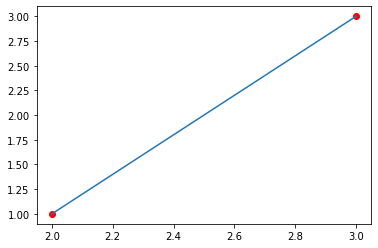

In [2]:
(x1, y1) = (2,1) #Axis
(x2,y2) = (3,3)

plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'ro')
plt.plot([x1,x2], [y1, y2])
plt.show()

To solve for constants $a$ and $b$, we can write these two equations:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Using basic algebra, we find the values for $a$ and $b$ are:

$$a = 2$$

$$b = -3$$

Redrawing the graph with the y-intercept:


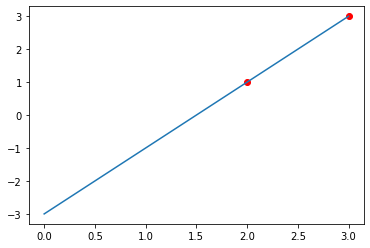

In [3]:
 a = 2
 b = -3

plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'ro')
plt.plot([0,x2], [b, y2])
plt.show()

## Linear Algebra

The problem above can be abstracted using [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra). The system of equations above can be rewritten in matrix form:


$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$


This can be written more generally as matrix equation

$$y = A v$$

Where $y$ and $v$ are vectors and $A$ is a matrix:

$$y = \begin{bmatrix}
1 \\
3
\end{bmatrix}$$

$$v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

$$A = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix}$$


To solve for $a$ and $b$, which is equivalent to solving for the vector $v$, consider how we would solve a simple equation such as

$$1 = 2 x$$

We could multiply both sides of the equation by the inverse of $2$, which is $2^{-1}$

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

$2 \times 2^{-1}$ is just $1$, so

$$x = \frac{1}{2}$$


By analogy, multiplying the matrix equation above by the inverse of $A$ or $A^{-1}$ on both sides would look like this

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

The quantity $A^{-1} A$ becomes the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), so the vector $v$ would then be

$$v = A^{-1} y$$

NumPy contains methods to compute the inverse of a matrix.


In [4]:
#Create a 2x2 matrix

A = np.array([[x1, 1,], [x2,1]])
A

array([[2, 1],
       [3, 1]])

In [5]:
#Create the inverse of A

inv = np.linalg.inv(A)
Ainv

NameError: ignored

In [ ]:
#Mulitply the inverse of A with A to cinfirm it rpoduces the indentity matrix

Ainv.dot(A)

This is the value of the identity matrix with a very small round-off error:

$$A^{-1} A = I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Multiplying the vector $v$ with $A^{-1}$ on the left yields the vector $y$:


In [ ]:
y = np.array([1,3])
v = Ainv.dot(y)
v

## More Data

Consider the case when more than two data points are available.


This can be rewritten in matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$


Introduce variables for simplification:

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$


Substitute variables above to produce a simplifed form:

$$ y = A v$$


If $A$ is a square matrix, i.e. $n = 2$, $a$ and $b$ can be determined exactly:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = v = A^{-1} y$$


In the case where $n > 2$, $A$ is not square and cannot be inverted. One solution is to compute a pseudo-inverse by multiplying $A$ by it's transpose $A^T$, which will yield a square matrix on the right hand side:

$$ A^T y = A^T A v$$


he matrix $A^T A$ on the right can be eliminated by multiplying by it's inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) v$$


Simplifying yields the result for $a$ and $b$:

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$


##Numerical exmaple
The followung is an exmaple with real values.

In [ ]:
x = np.array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

y = np.array([ 0.7261771 ,  2.86206199, -0.2489528 ,  0.63325248,  4.49244568,
        5.30531409, 13.6101148 ,  8.48395548, 10.42996366, 14.74172737,
       15.88897483, 23.76571743, 23.61602269, 20.17880228, 25.85779471,
       30.11114371, 26.88735809, 28.57977723, 30.99383456, 33.03676545])

plt.scatter(x, y, color='red')
plt.show()


Prepare matrix A of the form

$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$


In [ ]:
x_matrix = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_matrix, ones, axis=1)
A

In [ ]:
x_matrix = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_matrix, ones, axis=1)
A

In [ ]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
pseudo_inv

Compute $a$ and $b$ by multiplying the pseudo-inverse times $y$

$$\begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$


In [ ]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.show()